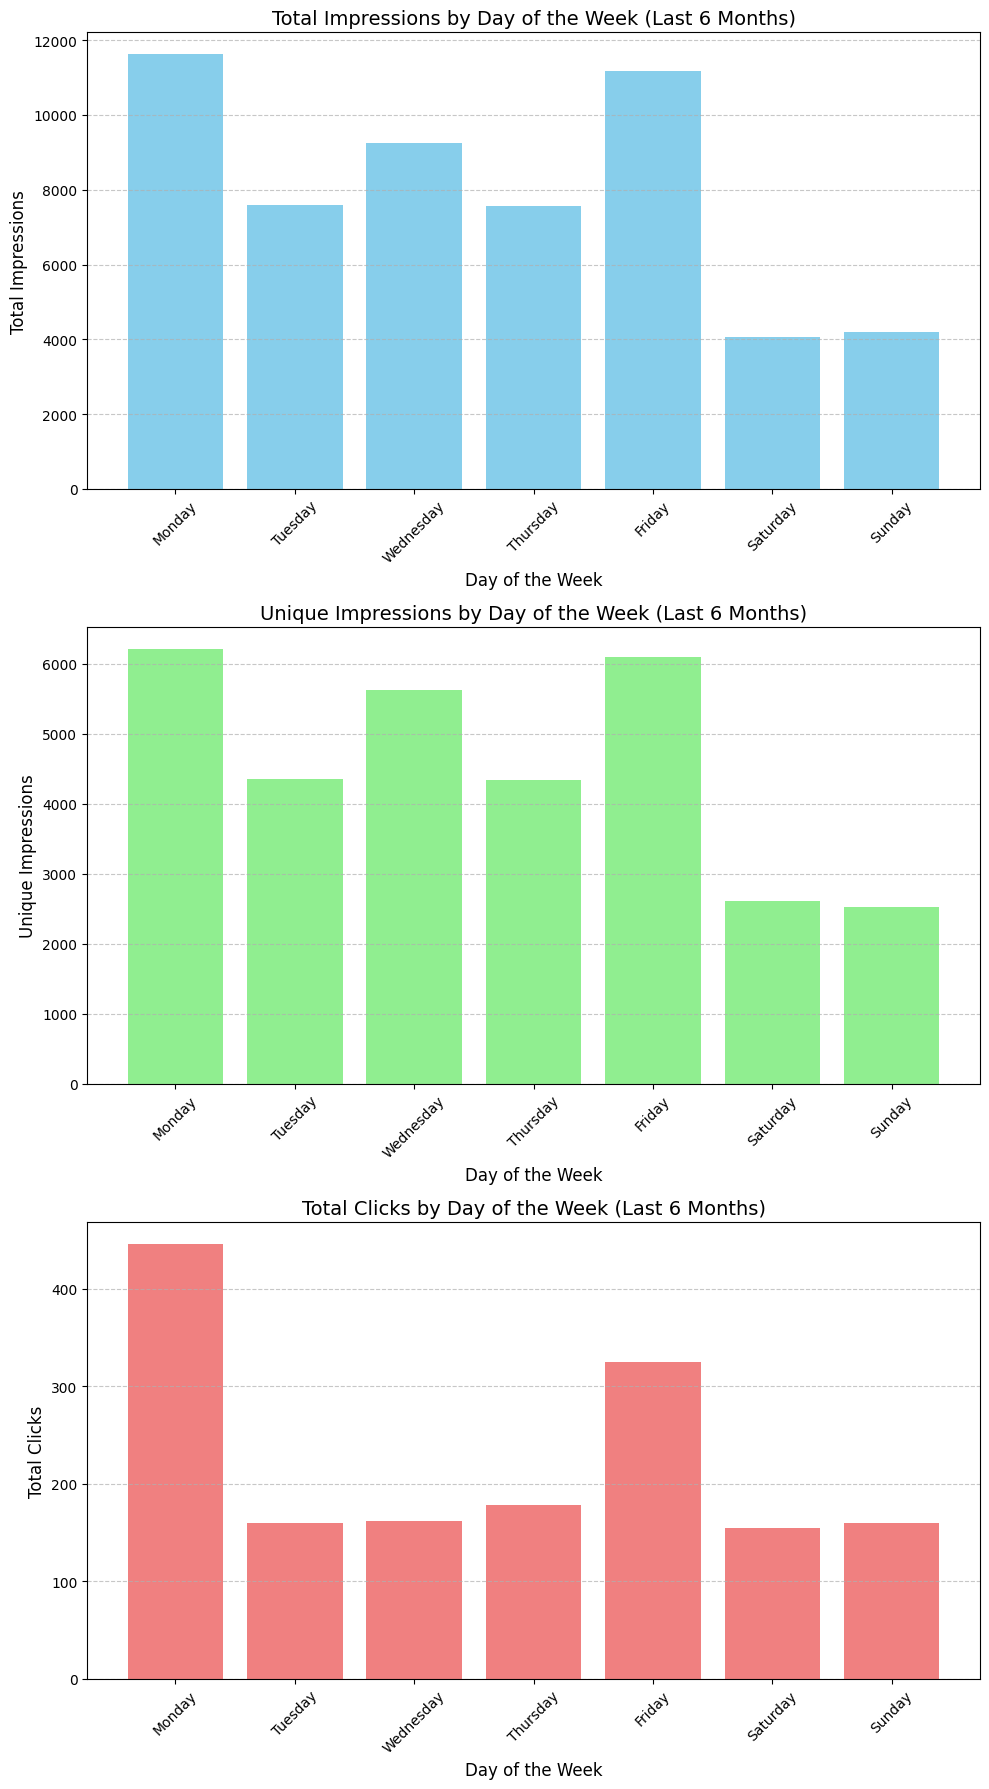

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file
file_path = 'knowit-connectivity_content_1708421813693 - Metrics.csv'
data = pd.read_csv(file_path)

# Correcting the column headers
data.columns = data.iloc[0]
data = data[1:]

# Converting 'Date' column to datetime format and other necessary columns to integer type
data['Date'] = pd.to_datetime(data['Date'])
data['Impressions (total)'] = data['Impressions (total)'].astype(int)
data['Unique impressions (organic)'] = data['Unique impressions (organic)'].astype(int)
data['Clicks (total)'] = data['Clicks (total)'].astype(int)

# Filtering the data for the last 6 months and avoiding SettingWithCopyWarning by creating a copy
latest_date = data['Date'].max()
six_months_ago = latest_date - pd.DateOffset(months=6)
filtered_data = data[data['Date'] > six_months_ago].copy()

# Adding a new column for the day of the week
filtered_data['Day of Week'] = filtered_data['Date'].dt.day_name()

# Grouping data by 'Day of Week' for each metric
weekly_impressions = filtered_data.groupby('Day of Week')['Impressions (total)'].sum().reset_index()
weekly_unique_impressions = filtered_data.groupby('Day of Week')['Unique impressions (organic)'].sum().reset_index()
weekly_clicks = filtered_data.groupby('Day of Week')['Clicks (total)'].sum().reset_index()

# Sorting the days of the week in order
sorter = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_impressions['Day of Week'] = pd.Categorical(weekly_impressions['Day of Week'], categories=sorter, ordered=True)
weekly_unique_impressions['Day of Week'] = pd.Categorical(weekly_unique_impressions['Day of Week'], categories=sorter, ordered=True)
weekly_clicks['Day of Week'] = pd.Categorical(weekly_clicks['Day of Week'], categories=sorter, ordered=True)

weekly_impressions = weekly_impressions.sort_values('Day of Week')
weekly_unique_impressions = weekly_unique_impressions.sort_values('Day of Week')
weekly_clicks = weekly_clicks.sort_values('Day of Week')

# Plotting all three metrics together
fig, ax = plt.subplots(3, 1, figsize=(10, 18))

# Plot for total impressions
ax[0].bar(weekly_impressions['Day of Week'], weekly_impressions['Impressions (total)'], color='skyblue')
ax[0].set_title('Total Impressions by Day of the Week (Last 6 Months)', fontsize=14)
ax[0].set_xlabel('Day of the Week', fontsize=12)
ax[0].set_ylabel('Total Impressions', fontsize=12)
ax[0].tick_params(axis='x', rotation=45)
ax[0].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for unique impressions
ax[1].bar(weekly_unique_impressions['Day of Week'], weekly_unique_impressions['Unique impressions (organic)'], color='lightgreen')
ax[1].set_title('Unique Impressions by Day of the Week (Last 6 Months)', fontsize=14)
ax[1].set_xlabel('Day of the Week', fontsize=12)
ax[1].set_ylabel('Unique Impressions', fontsize=12)
ax[1].tick_params(axis='x', rotation=45)
ax[1].grid(axis='y', linestyle='--', alpha=0.7)

# Plot for clicks
ax[2].bar(weekly_clicks['Day of Week'], weekly_clicks['Clicks (total)'], color='lightcoral')
ax[2].set_title('Total Clicks by Day of the Week (Last 6 Months)', fontsize=14)
ax[2].set_xlabel('Day of the Week', fontsize=12)
ax[2].set_ylabel('Total Clicks', fontsize=12)
ax[2].tick_params(axis='x', rotation=45)
ax[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


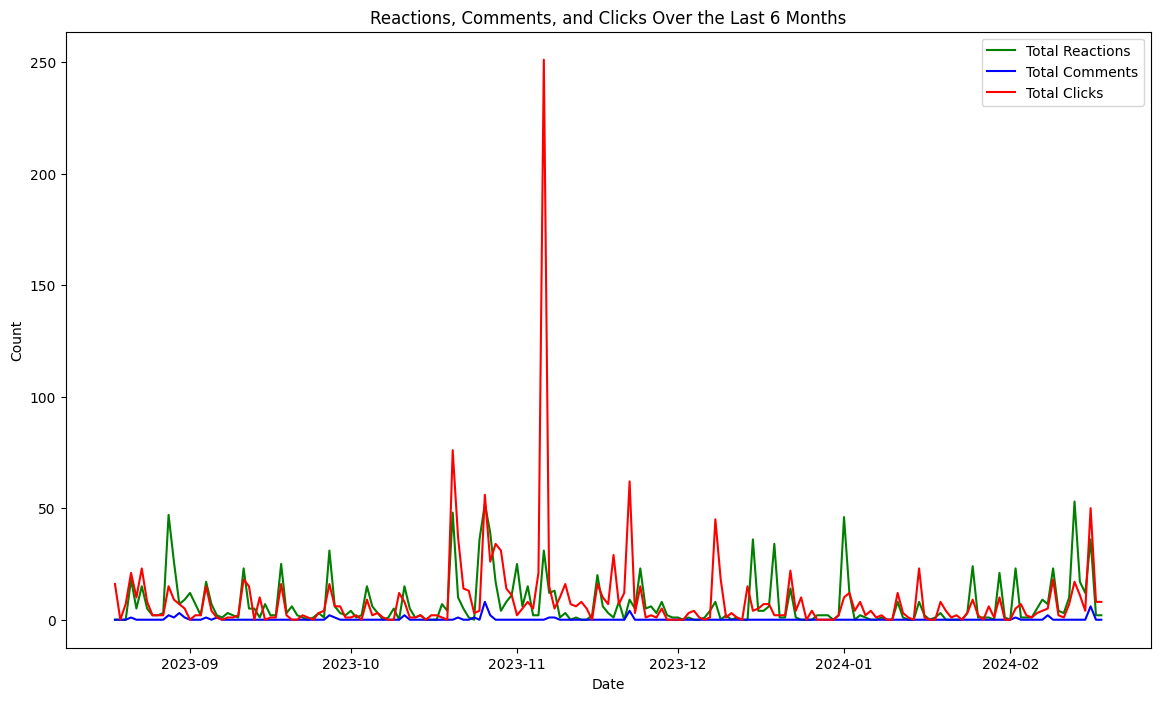

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('knowit-connectivity_content_1708421813693 - Metrics.csv')

# Cleaning and preparing the dataset
# Renaming columns for easier access
df.columns = [
    'Date', 'Impressions_organic', 'Impressions_sponsored', 'Impressions_total',
    'Unique_impressions_organic', 'Clicks_organic', 'Clicks_sponsored', 'Clicks_total',
    'Reactions_organic', 'Reactions_sponsored', 'Reactions_total', 'Comments_organic',
    'Comments_sponsored', 'Comments_total', 'Reposts_organic', 'Reposts_sponsored',
    'Reposts_total', 'Engagement_rate_organic', 'Engagement_rate_sponsored', 'Engagement_rate_total'
]
df = df.drop(index=0)  # Dropping the repeated header information
df['Date'] = pd.to_datetime(df['Date'])  # Converting 'Date' column to datetime format
numerical_columns = df.columns[1:]  # Converting numerical columns to float
df[numerical_columns] = df[numerical_columns].astype(float)

# Filtering the dataset for the latest 6 months
latest_6_months_df = df[df['Date'] >= (df['Date'].max() - pd.DateOffset(months=6))]

# Plotting Reactions, Comments, and Clicks together in a single graph
plt.figure(figsize=(14, 8))
plt.plot(latest_6_months_df['Date'], latest_6_months_df['Reactions_total'], label='Total Reactions', color='green')
plt.plot(latest_6_months_df['Date'], latest_6_months_df['Comments_total'], label='Total Comments', color='blue')
plt.plot(latest_6_months_df['Date'], latest_6_months_df['Clicks_total'], label='Total Clicks', color='red')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Reactions, Comments, and Clicks Over the Last 6 Months')
plt.legend()
plt.show()


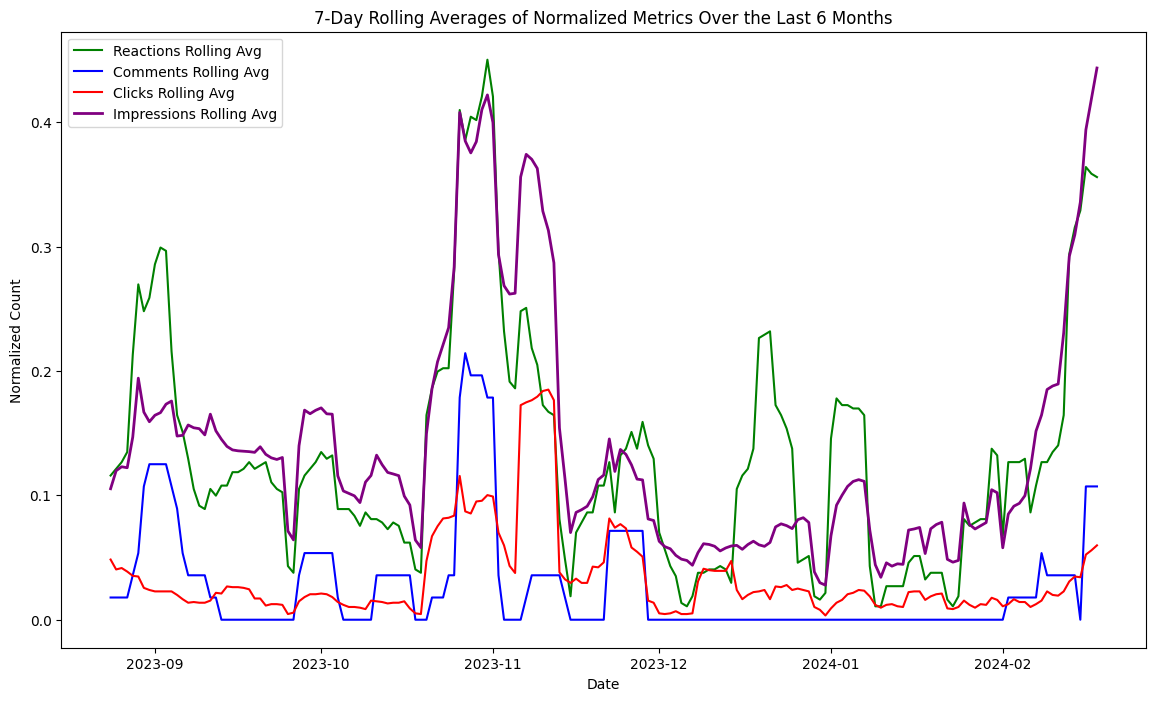

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
df = pd.read_csv('knowit-connectivity_content_1708421813693 - Metrics.csv')

# Cleaning and preparing the dataset
# Renaming columns for easier access
df.columns = [
    'Date', 'Impressions_organic', 'Impressions_sponsored', 'Impressions_total',
    'Unique_impressions_organic', 'Clicks_organic', 'Clicks_sponsored', 'Clicks_total',
    'Reactions_organic', 'Reactions_sponsored', 'Reactions_total', 'Comments_organic',
    'Comments_sponsored', 'Comments_total', 'Reposts_organic', 'Reposts_sponsored',
    'Reposts_total', 'Engagement_rate_organic', 'Engagement_rate_sponsored', 'Engagement_rate_total'
]
df = df.drop(index=0)  # Dropping the repeated header information
df['Date'] = pd.to_datetime(df['Date'])  # Converting 'Date' column to datetime format
numerical_columns = df.columns[1:]  # Converting numerical columns to float
df[numerical_columns] = df[numerical_columns].astype(float)

# Filtering the dataset for the latest 6 months
latest_6_months_df = df[df['Date'] >= (df['Date'].max() - pd.DateOffset(months=6))]

# Normalizing the engagement metrics
scaler = MinMaxScaler()
columns_to_normalize = ['Reactions_total', 'Comments_total', 'Clicks_total', 'Impressions_total']
normalized_data = scaler.fit_transform(latest_6_months_df[columns_to_normalize])
normalized_df = pd.DataFrame(normalized_data, columns=columns_to_normalize, index=latest_6_months_df['Date'])

# Calculating the 7-day rolling averages
normalized_df['Reactions_total_rolling'] = normalized_df['Reactions_total'].rolling(window=7).mean()
normalized_df['Comments_total_rolling'] = normalized_df['Comments_total'].rolling(window=7).mean()
normalized_df['Clicks_total_rolling'] = normalized_df['Clicks_total'].rolling(window=7).mean()
normalized_df['Impressions_total_rolling'] = normalized_df['Impressions_total'].rolling(window=7).mean()

# Plotting the 7-day rolling averages for the normalized metrics
plt.figure(figsize=(14, 8))
plt.plot(normalized_df.index, normalized_df['Reactions_total_rolling'], label='Reactions Rolling Avg', color='green')
plt.plot(normalized_df.index, normalized_df['Comments_total_rolling'], label='Comments Rolling Avg', color='blue')
plt.plot(normalized_df.index, normalized_df['Clicks_total_rolling'], label='Clicks Rolling Avg', color='red')
plt.plot(normalized_df.index, normalized_df['Impressions_total_rolling'], label='Impressions Rolling Avg', color='purple', linewidth=2)

plt.xlabel('Date')
plt.ylabel('Normalized Count')
plt.title('7-Day Rolling Averages of Normalized Metrics Over the Last 6 Months')
plt.legend()
plt.show()


In [2]:
import pandas as pd
import re
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Load the CSV file, assuming semicolon (;) as delimiter
data = pd.read_csv('posts.csv', delimiter=';')

# Clean the text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters and numbers
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces and tabs
    return text

data['Cleaned_Description'] = data['Description'].apply(clean_text)

# Determine the sentiment of each post
def get_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity
    if polarity > 0:
        return 'Positive'
    elif polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

data['Sentiment'] = data['Cleaned_Description'].apply(get_sentiment)

# Keyword extraction
vectorizer = CountVectorizer(stop_words='english', max_features=10)
X = vectorizer.fit_transform(data['Cleaned_Description'])

word_counts = np.array(X.sum(axis=0)).flatten()
words = vectorizer.get_feature_names_out()
keywords_df = pd.DataFrame({'Keyword': words, 'Count': word_counts}).sort_values(by='Count', ascending=False)

# Display results (modify as needed)
print(data[['Description', 'Cleaned_Description', 'Sentiment']])
print(keywords_df)


ModuleNotFoundError: No module named 'textblob'